**Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Descriptive statistics**

In [ ]:
df_mpg = sns.load_dataset('mpg')
df_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
df_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df_mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
def plot_central_tendency(col, kind='hist'):
    mean_score = df_mpg[col].mean()
    median_score = df_mpg[col].median()

    sns.displot(df_mpg[col], kind=kind)
    plt.axvline(mean_score, ls='--', color='green', label='mean')
    plt.axvline(median_score, ls='--', color='orange', label='median')
    plt.legend()
    plt.show()

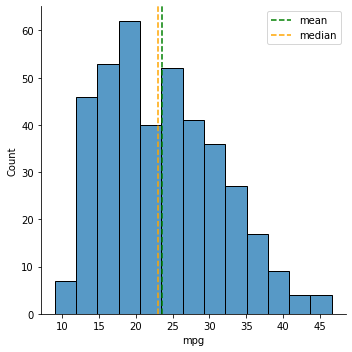

In [ ]:
plot_central_tendency('mpg')

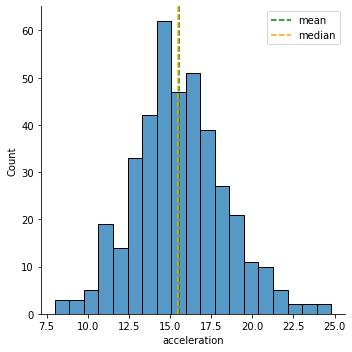

In [ ]:
plot_central_tendency('acceleration')

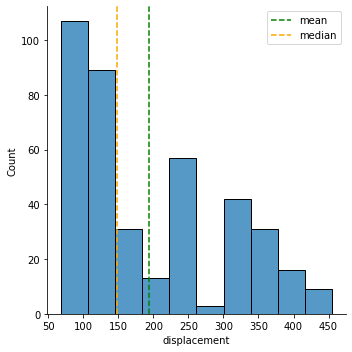

In [ ]:
plot_central_tendency('displacement')

In [ ]:
df_mpg['origin'].mode()

0    usa
dtype: object

In [ ]:
df_mpg['origin'].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

**Probability Distribution**

    Coin Flip

In [ ]:
n_trials = 10000
flips = np.random.randint(0, 2, n_trials)

num, count = np.unique(flips, return_counts=True)
df_count = pd.DataFrame.from_dict(dict(zip(num, count)), orient='index'
                                ).reset_index().rename(columns={'index':'x', 0: 'count'})
df_count['prob'] = df_count['count'] / n_trials
df_count['x'] = df_count['x'].apply(lambda x: 'tail' if x == 0 else 'head')

df_count

,x,count,prob
0,tail,4919,0.4919
1,head,5081,0.5081


After 10,000 coin flips, the number of heads and tails are almost equal.

In [ ]:
n_trials = 10000
df_count_per_trial = pd.DataFrame(columns=['nth_trial', 'head_count', 'prob'])

curr_head_count = 0

for nth_trial in range(1, n_trials + 1):
    curr_head_count += np.random.randint(0, 2)
    curr_prob = curr_head_count / nth_trial
    df_count_per_trial = df_count_per_trial.append({
                                                    'nth_trial': nth_trial,
                                                    'head_count': curr_head_count,
                                                    'prob': curr_prob
    }, ignore_index=True)

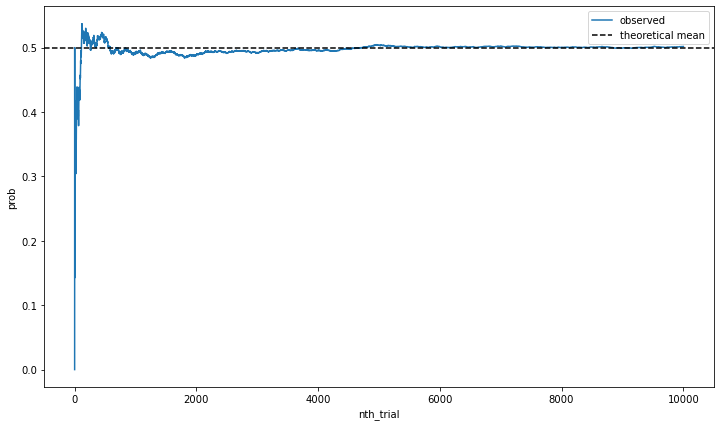

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.lineplot(x='nth_trial', y='prob', data=df_count_per_trial, label='observed')
plt.axhline(0.5, ls='--', color='black', label='theoretical mean')
plt.legend();

    Dice Roll

In [ ]:
n_trial = 10000
rolls = np.random.randint(1, 7, n_trial)

num, count = np.unique(rolls, return_counts=True)
df_count = pd.DataFrame.from_dict(dict(zip(num, count)), orient='index'
                                    ).reset_index().rename(columns={'index':'x', 0: 'count'})

df_count['prob'] = df_count['count'] / n_trial

df_count

,x,count,prob
0,1,1716,0.1716
1,2,1702,0.1702
2,3,1648,0.1648
3,4,1672,0.1672
4,5,1657,0.1657
5,6,1605,0.1605


The probability of each possible outcome is close to each other.

    Salary

In [ ]:
np.warnings.filterwarnings('ignore')

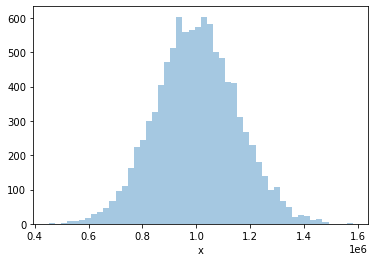

In [ ]:
from scipy.stats import norm

salaries = norm.rvs(loc=1000000, scale=150000, size=10000).round()

num, count = np.unique(salaries, return_counts=True)

df_count = pd.DataFrame.from_dict(dict(zip(num, count)), orient='index'
                                    ).reset_index().rename(columns={'index':'x', 0: 'count'})

df_count['prob'] = df_count['count'] / 1000
sns.distplot(df_count['x'], kde=False);

**Central Limit Theorem**

"*When independent random variables are added, their properly normalized sum tends toward a normal distribution, even if the original variables themselves are not normally distributed.*"

    Initially normally distributed

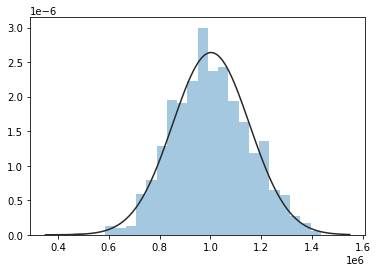

In [ ]:
from scipy.stats import norm, uniform, expon

salaries = norm.rvs(loc=1000000, scale=150000, size=1000).round()
sns.distplot(salaries, kde=False, fit=norm);

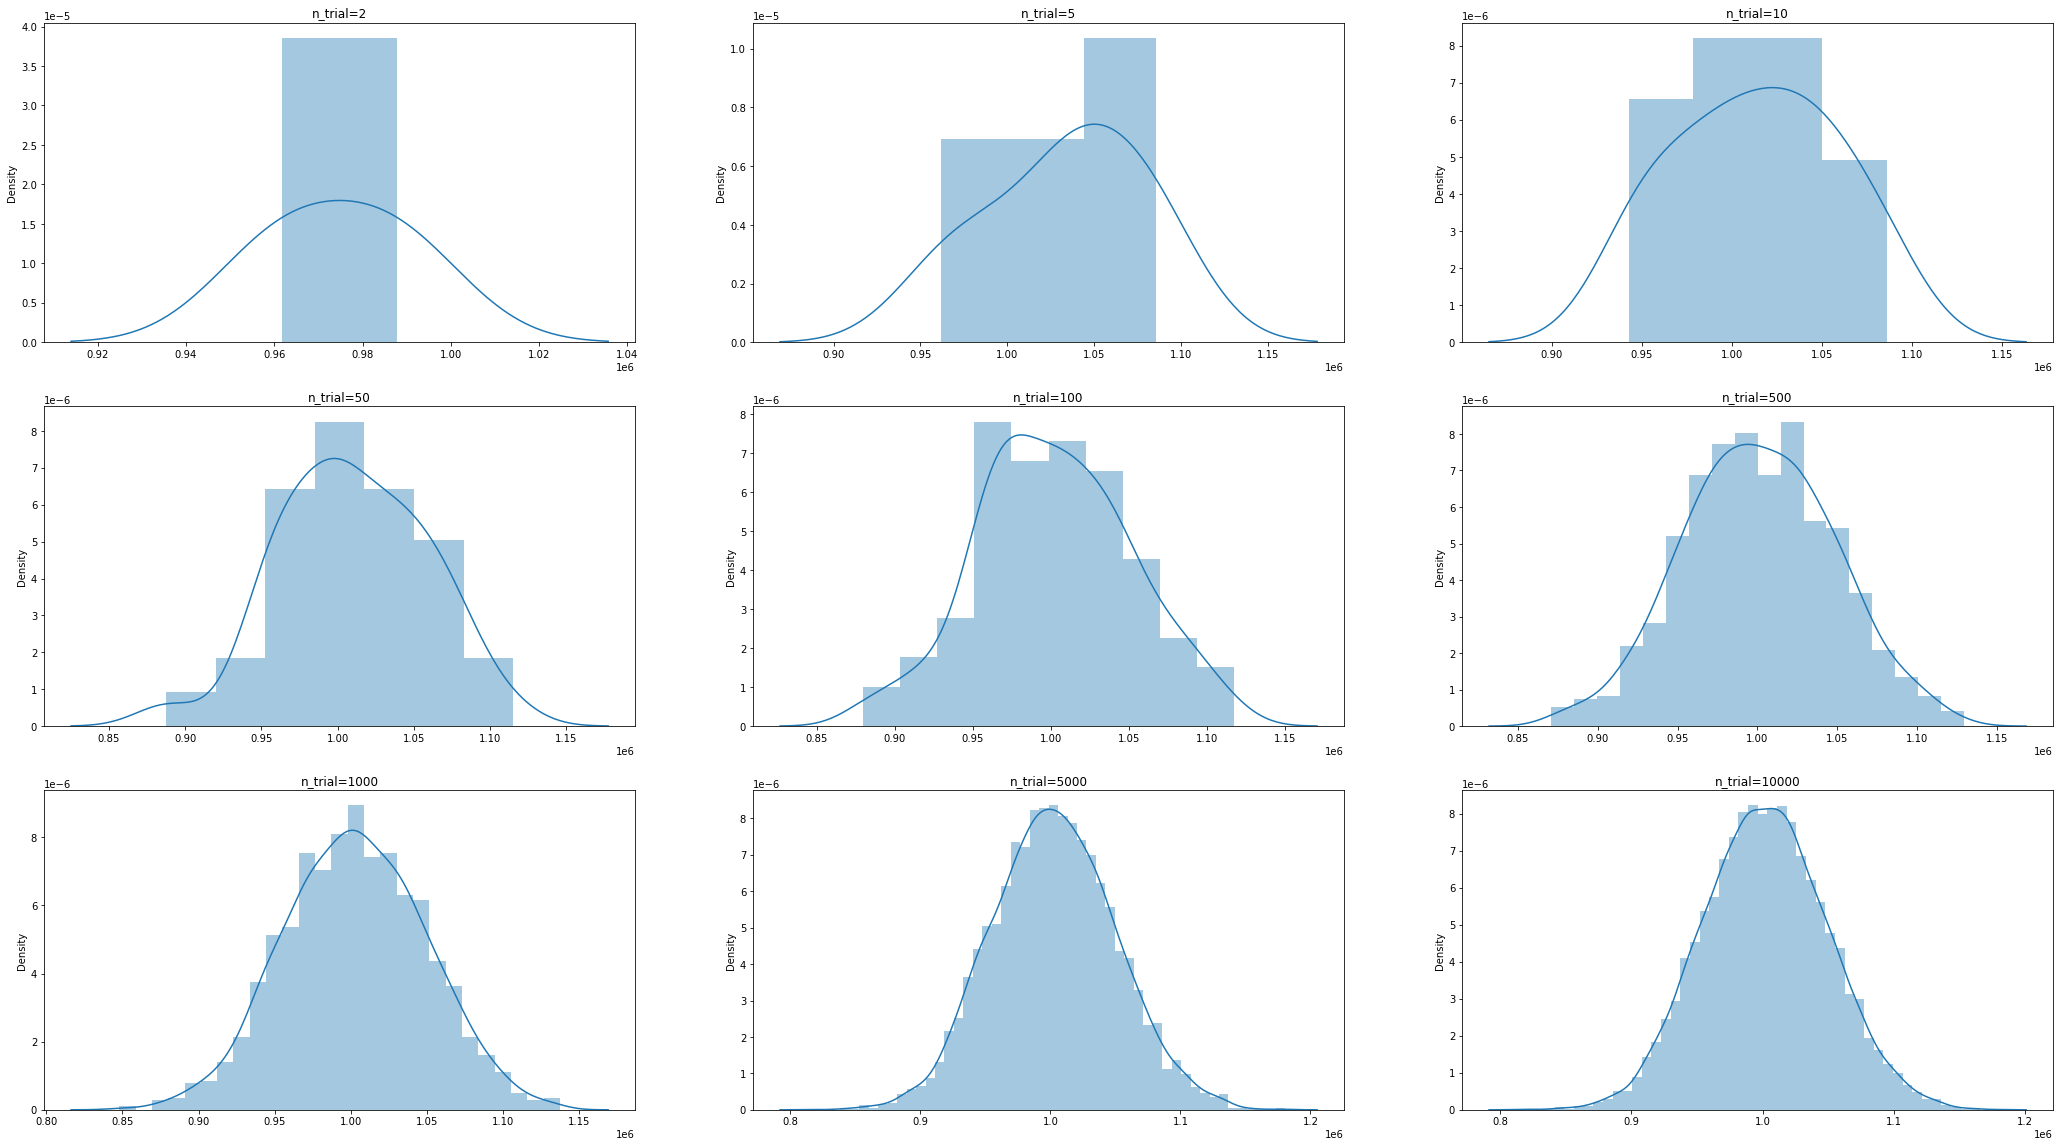

In [ ]:
from random import sample

fig, ax = plt.subplots(3, 3, figsize=(36, 20))

count_res = []
sample_size = 10

for ix, n_trial in enumerate([2, 5, 10, 50, 100, 500, 1000, 5000, 10000]):
    for i in range(n_trial):
        curr_sample = sample(list(salaries), sample_size)
        count_res.append(np.mean(curr_sample))

    curr_ax = ax.flatten()[ix]
    sns.distplot(count_res, ax=curr_ax)
    curr_ax.title.set_text('n_trial={}'.format(n_trial))

     Initially not normally distributed

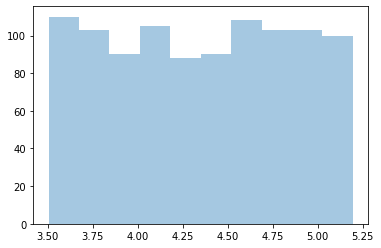

In [ ]:
from scipy.stats import uniform

uni = uniform.rvs(loc=3.5, scale=1.7, size=1000)
sns.distplot(uni, kde=False);

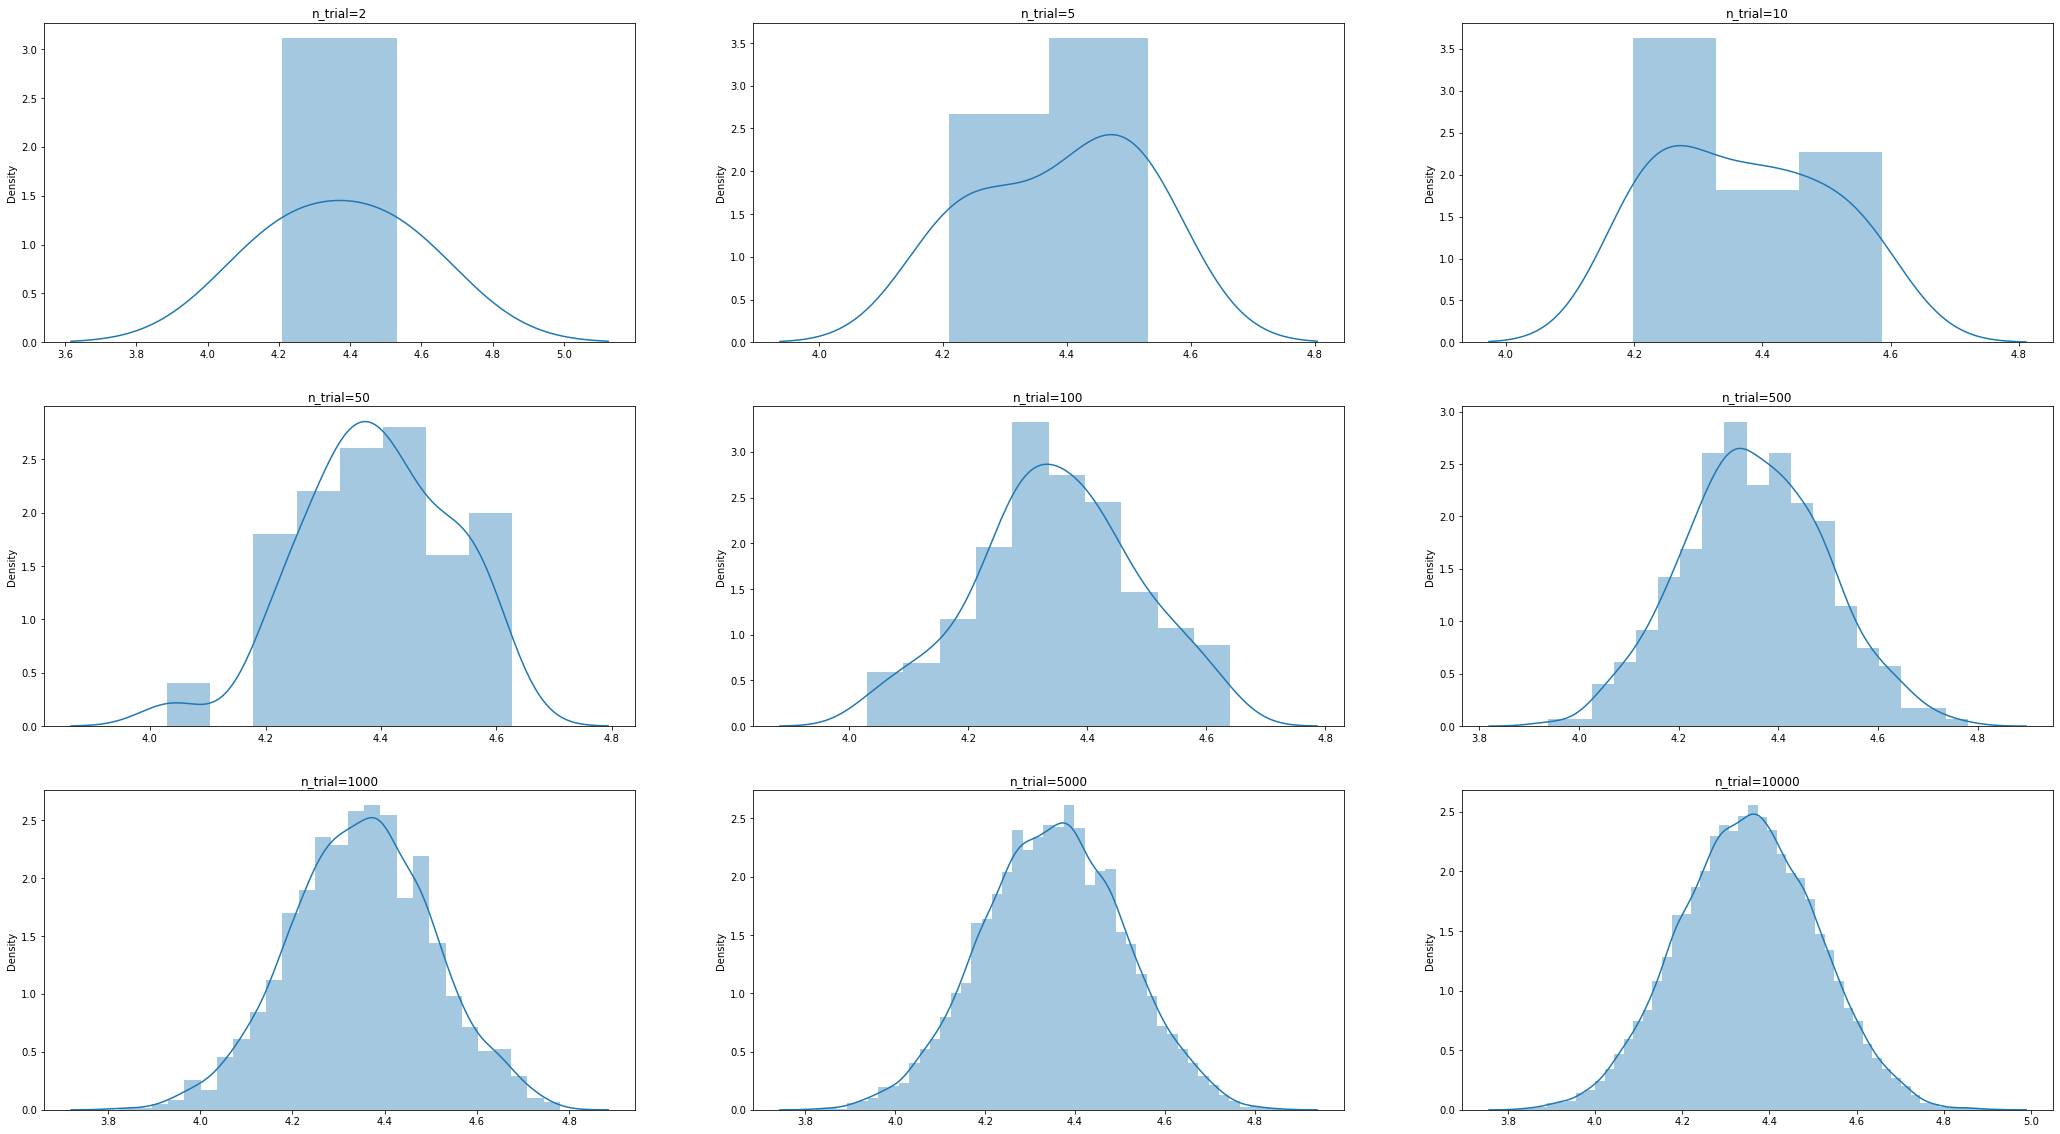

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(36, 20))

count_res = []
sample_size=10

for ix, n_trial in enumerate([2, 5, 10, 50, 100, 500, 1000, 5000, 10000]):
    for i in range(n_trial):
        curr_sample = sample(list(uni), sample_size)
        count_res.append(np.mean(curr_sample))

    curr_ax = ax.flatten()[ix]
    sns.distplot(count_res, ax=curr_ax)
    curr_ax.title.set_text('n_trial={}'.format(n_trial))

- Normal (Gaussian) --> bell-shaped
- Exponential --> t waiting time until an event happened
- Bernoulli --> two possible outcomes, once
- Binomial --> two possible outcomes, n times
- Uniform --> equally likely for each possible outcome
- Poisson --> n of event happened during t interval
- Geometric --> n trials until "success"

**Probability Mass Function**

Distribusi:

1. Bernoulli: Percobaan dengan dua buah possible outcome sebanyak 1 kali. Contoh: Flip 1 coin.
2. Binomial: Percobaan dengan dua buah possible outcome sebanyak berkali-kali. Contoh: Kita melakukan flip coin sebanyak 3 kali, lalu kita ingin mencari probability outcomenya adalah head itu berapa --> 0x, 1x, 2x, 3x.
3. Geometric: Perlu n kali percobaan sebelum mencapai 'sukses'. Contoh: Kalau kita mau menendang penalti dan kipernya jago, kita butuh berapa kali tendangan agar bisa memasukkan gol sebanyak x kali.
4. Poisson: Berapa kali suatu hal terjadi dalam suatu rentang (e.g. jarak, waktu). Contoh: Sebuah rumah sakit memiliki data bahwa ada 2 orang yang melahirkan dalam rentang waktu 1 jam. Lalu, pihak rumah sakit ingin mengetahui probability terjadinya 4 orang melahirkan dalam waktu 1 jam.
5. Hypergeometric: Punya 6 bola, yang mana adalah 4 bola merah dan 2 bola biru. Peluang mendapatkan 2 bola biru? 

**Inferential Statistics**

    Height  

Assume that these are the heights of male citizens in Jakarta with age between 24-29 years old.

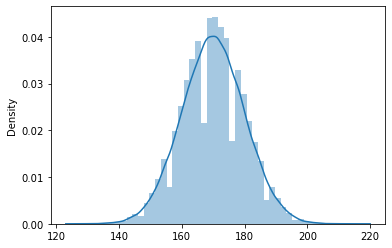

In [ ]:
height_population = norm.rvs(loc=170, scale=10, size=100000).round()
sns.distplot(height_population);

Assume that we'd like to estimate mean as the population parameter.

In [ ]:
mu = height_population.mean()
mu

169.97422

In [ ]:
from random import sample

n = 100

height_sample = sample(list(height_population), n)
print(height_sample, end=' ')

[176.0, 169.0, 159.0, 171.0, 164.0, 166.0, 164.0, 170.0, 179.0, 162.0, 163.0, 163.0, 174.0, 165.0, 165.0, 159.0, 185.0, 175.0, 169.0, 165.0, 174.0, 160.0, 158.0, 169.0, 156.0, 178.0, 172.0, 159.0, 160.0, 178.0, 172.0, 184.0, 177.0, 177.0, 161.0, 172.0, 168.0, 158.0, 167.0, 160.0, 172.0, 170.0, 172.0, 159.0, 163.0, 174.0, 169.0, 168.0, 176.0, 163.0, 158.0, 186.0, 178.0, 168.0, 174.0, 161.0, 170.0, 181.0, 163.0, 172.0, 168.0, 169.0, 159.0, 169.0, 189.0, 169.0, 180.0, 157.0, 158.0, 156.0, 168.0, 173.0, 158.0, 170.0, 185.0, 173.0, 182.0, 174.0, 169.0, 176.0, 194.0, 162.0, 190.0, 153.0, 178.0, 161.0, 161.0, 172.0, 158.0, 174.0, 163.0, 163.0, 183.0, 162.0, 173.0, 158.0, 164.0, 144.0, 165.0, 164.0] 

*Using point estimate*

In [ ]:
x_bar = np.mean(height_sample)
x_bar

168.64

*Using confidence interval*

In [ ]:
from scipy.stats import t

# Calculate s and n for calculating std error
s = np.std(height_sample, ddof=1) # use ddof=1 since we're calculating sample std
std_error = s / np.sqrt(n)

confidence_level = 0.99
alpha = 1 - confidence_level

# Assume that this is a two-tailed test
df = n - 1
# t_dist = t.rvs(df, 100000)
num_of_tail = 2
t_score = t.ppf(1-(alpha/num_of_tail), df)

In [ ]:
t_score

2.6264054563851857

In [ ]:
bound = t_score * std_error
lower_bound = round(x_bar - bound, 2)
upper_bound = round(x_bar + bound, 2)

In [ ]:
bound

0.09750697708993937

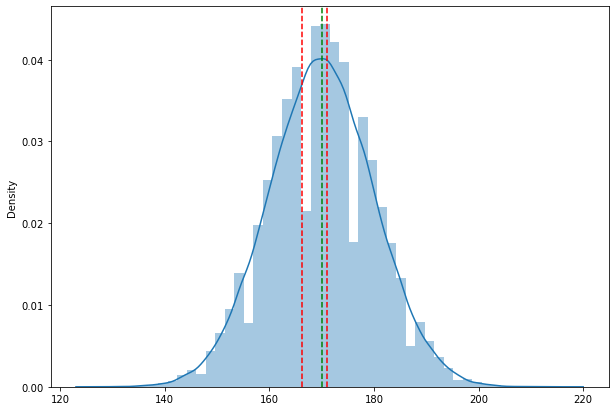

In [ ]:
plt.figure(figsize=(10, 7))
sns.distplot(height_population)
plt.axvline(170, ls='--', color='green')
plt.axvline(lower_bound, ls='--', color='red')
plt.axvline(upper_bound, ls='--', color='red');

In [ ]:
print(f'Interval estimate with {confidence_level * 100}% confidence level: {lower_bound} - {upper_bound} cm.')

Interval estimate with 99.0% confidence level: 166.29 - 170.99 cm.


    Survey

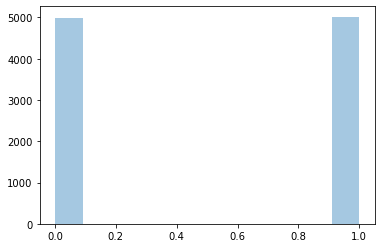

In [ ]:
answers_population = np.random.randint(0, 2, 10000)
sns.distplot(answers_population, kde=False);

In [ ]:
np.unique(answers_population, return_counts=True)

(array([0, 1]), array([4982, 5018], dtype=int64))

In [ ]:
answer, count = np.unique(answers_population, return_counts=True)

Assume that we'd like to estimate proportion as the population parameter.

In [ ]:
P = count[1] / count.sum()
P

0.5018

In [ ]:
n = 100

answers_sample = sample(list(answers_population), n)

*Using point estimate*

In [ ]:
answer, count = np.unique(answers_sample, return_counts=True)
p = count[1] / count.sum()
p

0.45

*Using confidence interval*

In [ ]:
from scipy.stats import norm

std_error = np.sqrt(p * (1-p) / n)

confidence_level = 0.95
alpha = 1 - confidence_level

# Assume that this is a two-tail test
num_of_tail = 2
z_score = norm.ppf(1 - (alpha/2))

In [ ]:
z_score

1.959963984540054

In [ ]:
std_error

0.049749371855331

In [ ]:
bound = z_score * std_error
lower_bound = round((p - bound) * 100, 2)
upper_bound = round((p + bound) * 100, 2)

In [ ]:
bound

0.09750697708993937

In [ ]:
print(f'Interval estimate with {confidence_level * 100}% confidence level: {lower_bound} - {upper_bound}% yang setuju renovasi.')

Interval estimate with 95.0% confidence level: 35.25 - 54.75% yang setuju renovasi.
